# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 28 (Thursday) 11:00 pm </font>  

<font color="blue"> Atefeh Mahdavi </font>

# I. Overview

In this assignment I will work on cross validation, non-linear regression and non-linear logistic regression on neural networks. I will go through conepts of each, have the implementation and explain the code. Then I will get the results and compare them to see what are the best parameters for training models. I will have visualizations to help me with understaing the results and then I will discuss my findings.

# II. Data

## Introduction of data for regression & source
This dataset is a bike sharing system data which contains attributes related to time, weather condition and registrations status. The target is the count of bikes per day.

The source of data is UCI website. More information about the source can be found on the references section.

There are 17 attributes in this dataset. <dteday,season,yr,mnth,hr,holiday,weekday,workingday> are refering to the date and time and and some other related information about the day in which data was collected. <weathersit,temp,atemp,hum,windspeed> are refering to the weather condition. Finally <casual,registered,cnt> are refering to the registration stutus of the user.

## Preprocessing of the data

In this section I will read the data and remove the null values if any from the dataset. I also slice the instances for increasing the runtime in visualization.

### Read data

In [ ]:
# libraries
from IPython.display import Math
import pandas as pd 
import json
import csv 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample 

import seaborn as sns
sns.set(style="darkgrid")

In [143]:
with open("hour.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df = pd.DataFrame(data)

#removing null values and comverting strings to numerical values
df = df[df.notnull()]
df[["temp", "atemp", "hum", "windspeed", "casual","registered", "cnt"]] = df[["temp", "atemp", "hum", "windspeed", "casual","registered", "cnt"]].apply(pd.to_numeric)


In [144]:
# normalizing the data
df.registered.replace({0:df['registered'].median()},inplace=True)
df.casual.replace({0:df['casual'].median()},inplace=True)
df= df.drop(columns=['dteday'])
df

instant season yr mnth  hr holiday weekday workingday weathersit  temp  \
0           1      1  0    1   0       0       6          0          1  0.24   
1           2      1  0    1   1       0       6          0          1  0.22   
2           3      1  0    1   2       0       6          0          1  0.22   
3           4      1  0    1   3       0       6          0          1  0.24   
4           5      1  0    1   4       0       6          0          1  0.24   
5           6      1  0    1   5       0       6          0          2  0.24   
6           7      1  0    1   6       0       6          0          1  0.22   
7           8      1  0    1   7       0       6          0          1  0.20   
8           9      1  0    1   8       0       6          0          1  0.24   
9          10      1  0    1   9       0       6          0          1  0.32   
10         11      1  0    1  10       0       6          0          1  0.38   
11         12      1  0    1  11       0       6          0          1  0.36   
12         13      1  0    1  12       0       6          0          1  0.42   
13         14      1  0    1  13       0       6          0          2  0.46   
14         15      1  0    1  14       0       6          0          2  0.46   
15         16      1  0    1  15       0       6          0          2  0.44   
16         17      1  0    1  16       0       6          0          2  0.42   
17         18      1  0    1  17       0       6          0          2  0.44   
18         19      1  0    1  18       0       6          0          3  0.42   
19         20      1  0    1  19       0       6          0          3  0.42   
20         21      1  0    1  20       0       6          0          2  0.40   
21         22      1  0    1  21       0       6          0          2  0.40   
22         23      1  0    1  22       0       6          0          2  0.40   
23         24      1  0    1  23       0       6          0          2  0.46   
24         25      1  0    1   0       0       0          0          2  0.46   
25         26      1  0    1   1       0       0          0          2  0.44   
26         27      1  0    1   2       0       0          0          2  0.42   
27         28      1  0    1   3       0       0          0          2  0.46   
28         29      1  0    1   4       0       0          0          2  0.46   
29         30      1  0    1   6       0       0          0          3  0.42   
...       ...    ... ..  ...  ..     ...     ...        ...        ...   ...   
17349   17350      1  1   12  18       0       0          0          2  0.24   
17350   17351      1  1   12  19       0       0          0          1  0.34   
17351   17352      1  1   12  20       0       0          0          1  0.22   
17352   17353      1  1   12  21       0       0          0          1  0.20   
17353   17354      1  1   12  22       0       0          0          1  0.20   
17354   17355      1  1   12  23       0       0          0          1  0.20   
17355   17356      1  1   12   0       0       1          1          1  0.18   
17356   17357      1  1   12   1       0       1          1          1  0.18   
17357   17358      1  1   12   2       0       1          1          1  0.16   
17358   17359      1  1   12   3       0       1          1          1  0.16   
17359   17360      1  1   12   4       0       1          1          1  0.14   
17360   17361      1  1   12   5       0       1          1          1  0.16   
17361   17362      1  1   12   6       0       1          1          1  0.16   
17362   17363      1  1   12   7       0       1          1          1  0.16   
17363   17364      1  1   12   8       0       1          1          1  0.14   
17364   17365      1  1   12   9       0       1          1          2  0.18   
17365   17366      1  1   12  10       0       1          1          2  0.20   
17366   17367      1  1   12  11       0       1          1          2  0.22   
17367 

In [137]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null object
season        17379 non-null object
yr            17379 non-null object
mnth          17379 non-null object
hr            17379 non-null object
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null object
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null float64
registered    17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(6), int64(1), object(9)
memory usage: 2.1+ MB


###### Initial observations on the data

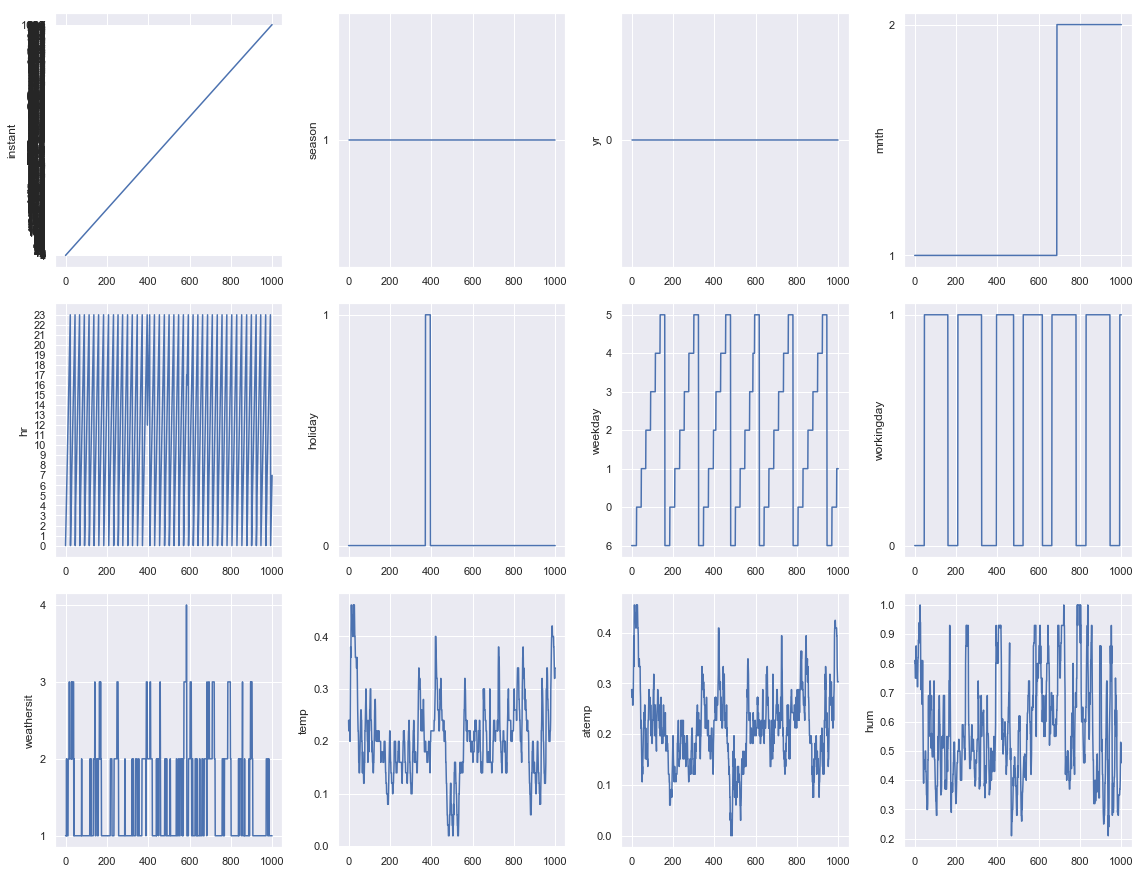

In [97]:
fig = plt.figure(figsize=(16,16))
plt.clf()
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

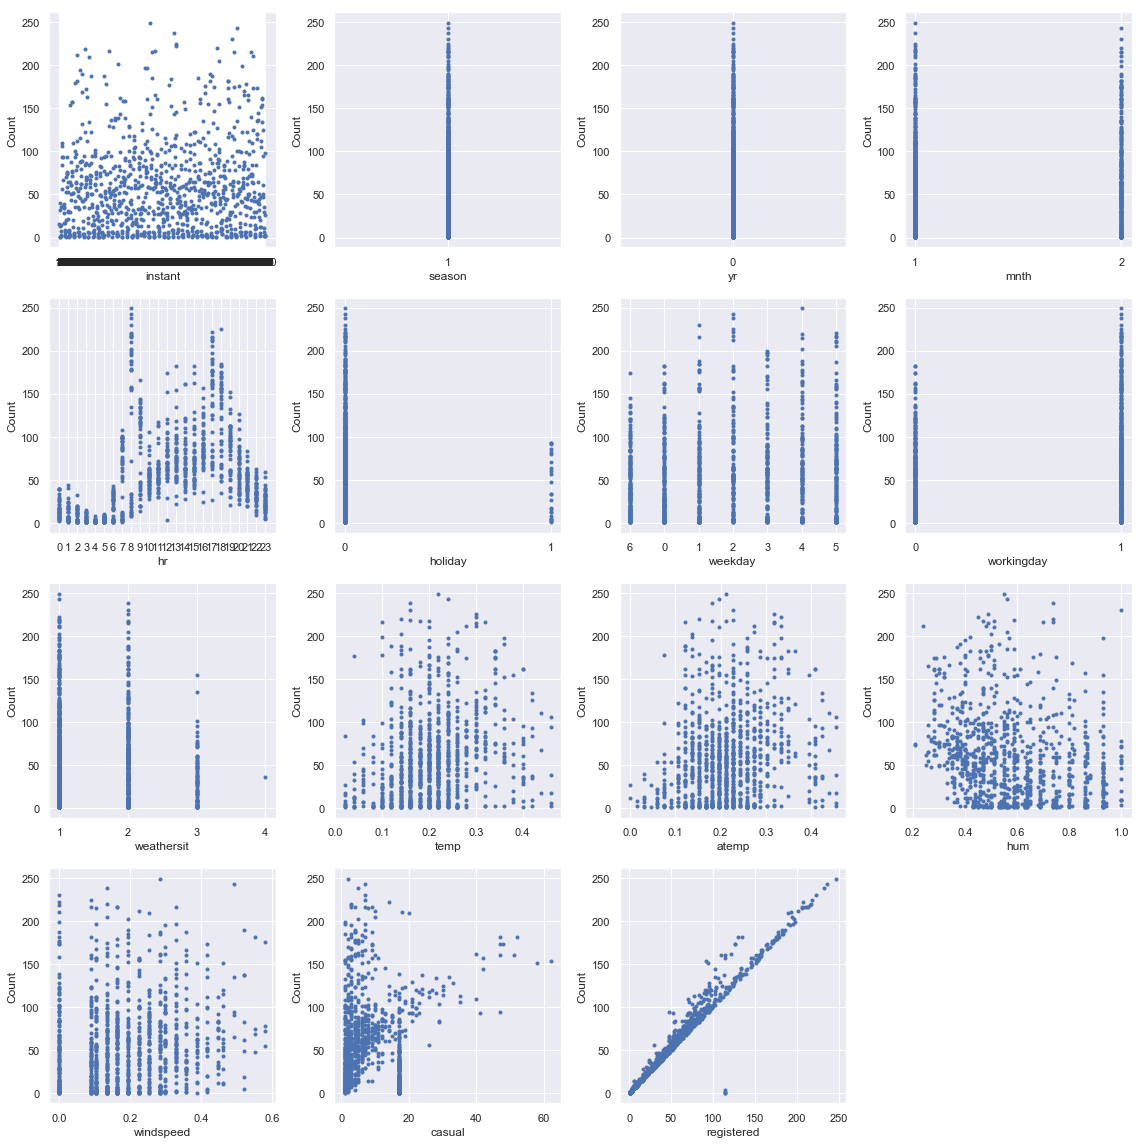

In [109]:
fig = plt.figure(figsize=(16,16))
plt.clf()
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Count')
fig.tight_layout()

## Introduction of data for classification & source
This dataset is the insurance dataset from a company based in Singapore. The source of the data is Kaggle website and is tagged as binary classification. 
Ther are 11 attributes in this dataset and the target label is the claim status.
The costumer is if someone files a claim or not. 

### Data preprocessing
Converting all the strings to corresponding numbers and dropping unnecessary features.

### Read data

In [85]:
with open("travelinsurance.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df2 = pd.DataFrame(data)
df2

Agency    Agency Type Distribution Channel  \
0        CBH  Travel Agency              Offline   
1        CBH  Travel Agency              Offline   
2        CWT  Travel Agency               Online   
3        CWT  Travel Agency               Online   
4        CWT  Travel Agency               Online   
5        JZI       Airlines               Online   
6        CWT  Travel Agency               Online   
7        CWT  Travel Agency               Online   
8        CWT  Travel Agency               Online   
9        CWT  Travel Agency               Online   
10       JZI       Airlines               Online   
11       JZI       Airlines               Online   
12       KML  Travel Agency               Online   
13       CWT  Travel Agency               Online   
14       EPX  Travel Agency               Online   
15       CWT  Travel Agency               Online   
16       CWT  Travel Agency               Online   
17       CWT  Travel Agency               Online   
18       JZI       Airlines               Online   
19       CWT  Travel Agency               Online   
20       CWT  Travel Agency               Online   
21       C2B       Airlines               Online   
22       C2B       Airlines               Online   
23       C2B       Airlines               Online   
24       C2B       Airlines               Online   
25       C2B       Airlines               Online   
26       CWT  Travel Agency               Online   
27       CWT  Travel Agency               Online   
28       CWT  Travel Agency               Online   
29       CWT  Travel Agency               Online   
...      ...            ...                  ...   
63296    EPX  Travel Agency               Online   
63297    EPX  Travel Agency               Online   
63298    EPX  Travel Agency               Online   
63299    EPX  Travel Agency               Online   
63300    EPX  Travel Agency               Online   
63301    EPX  Travel Agency               Online   
63302    EPX  Travel Agency               Online   
63303    EPX  Travel Agency               Online   
63304    EPX  Travel Agency               Online   
63305    RAB       Airlines               Online   
63306    RAB       Airlines               Online   
63307    SSI       Airlines               Online   
63308    SSI       Airlines               Online   
63309    SSI       Airlines               Online   
63310    SSI       Airlines               Online   
63311    SSI       Airlines               Online   
63312    SSI       Airlines               Online   
63313    SSI       Airlines               Online   
63314    JZI       Airlines               Online   
63315    JZI       Airlines               Online   
63316    JZI       Airlines               Online   
63317    JZI       Airlines               Online   
63318    JZI       Airlines               Online   
63319    JZI       Airlines               Online   
63320    JZI       Airlines               Online   
63321    JZI       Airlines               Online   
63322    JZI       Airlines               Online   
63323    JZI       Airlines               Online   
63324    JZI       Airlines               Online   
63325    JZI       Airlines               Online   

                          Product Name Claim Duration  \
0                   Comprehensive Plan    No      186   
1                   Comprehensive Plan    No      186   
2      Rental Vehicle Excess Insurance    No       65   
3      Rental Vehicle Excess Insurance    No       60   
4      Rental Vehicle Excess Insurance    No       79   
5                           Value Plan    No       66   
6      Rental Vehicle Excess Insurance    No       47   
7      Rental Vehicle Excess Insurance    No       63   
8      Rental Vehicle Excess Insurance    No       57   
9      Rental Vehicle Excess Insurance    No      186   
10                          Basic Plan    No       33   
11                          Basic Plan    No        1   
12                        Premier Plan  

In [86]:
#converting variables and removing null values
df2 = df2[df2.notnull()]
df2 = df2[df2.Gender != ""]
df2[["Duration", "Net Sales", "Commision (in value)", "Age"]]=df2[["Duration", "Net Sales", "Commision (in value)", "Age"]].apply(pd.to_numeric)

disChanneldic = {'Offline': 0, 'Online':1}
claimdic = {"No": -1, "Yes": 1.}
travelagencyid = {'Travel Agency': 0, 'Airlines':1}
genderdic = {"F": 0, "M": 1}
destinationid = {'MALAYSIA': 0, 'UNITED STATES':1, 'NORWAY':2, 'SINGAPORE':3, 'INDIA':4,
       'BRUNEI DARUSSALAM':80, 'AUSTRALIA':81, 'INDONESIA':82, 'THAILAND':83, 'CHINA':12,
       'PHILIPPINES':5, 'HONG KONG':6, 'VIET NAM':7, 'CAMBODIA':8, 'AUSTRIA':9,
       'MYANMAR':10, 'JAPAN':11, 'TAIWAN, PROVINCE OF CHINA':13, 'SRI LANKA':14,
       'UNITED KINGDOM':15, 'FRANCE':16, 'GERMANY':19, 'NETHERLANDS':20, 'MACAO':21,
       'KOREA, REPUBLIC OF':22, 'UNITED ARAB EMIRATES':23, 'DENMARK':24,
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC":25, 'ITALY':26, 'OMAN':27, 'NEW ZEALAND':28,
       'FIJI':29, 'POLAND':30, 'NEPAL':31, 'SPAIN':32, 'CANADA':33, 'BRAZIL':34, 'PORTUGAL':35,
       'IRELAND':36, 'NEW CALEDONIA':37, 'FINLAND':38, 'SAUDI ARABIA':39, 'JORDAN':40,
       'SWEDEN':41, 'GUINEA':42, 'TURKEY':43, 'BANGLADESH':44, 'MONGOLIA':45,
       'AZERBAIJAN':46, 'PAKISTAN':47, 'MOROCCO':48, 'SWITZERLAND':49, 'LITHUANIA':50,
       'MALI':51, 'BELGIUM':52, 'CZECH REPUBLIC':53, 'HUNGARY':54, 'PAPUA NEW GUINEA':55,
       'BAHRAIN':56, 'KENYA':57, 'MAURITIUS':58, 'CYPRUS':59, 'ANGOLA':60, 'BELARUS':61,
       'ESTONIA':62, 'ARGENTINA':63, 'NAMIBIA':64, 'BULGARIA':65, 'PERU':66, 'QATAR':67,
       'ISRAEL':68, 'TURKMENISTAN':69, 'EGYPT':70, 'BHUTAN':71, 'MEXICO':72,
       'IRAN, ISLAMIC REPUBLIC OF':73, 'UZBEKISTAN':74, 'RUSSIAN FEDERATION':75,
       'FRENCH POLYNESIA':76, 'MALDIVES':77, 'SOUTH AFRICA':78, 'CROATIA':79}

df2['Claim'] = df2['Claim'].apply(lambda x: claimdic[x])
df2['Gender'] = df2['Gender'].apply(lambda x: genderdic[x])
df2['Agency Type'] = df2['Agency Type'].apply(lambda x: travelagencyid[x])
df2['Destination'] = df2['Destination'].apply(lambda x: destinationid[x])
df2["Distribution Channel"] = df2["Distribution Channel"].apply(lambda x: disChanneldic[x])

# df2= df2.drop(['Agency'],axis=1)
# df2= df2.drop(['Product Name'],axis=1)

In [90]:
T2 = df2['Claim']
X2 = df2.drop(['Claim'],axis=1)

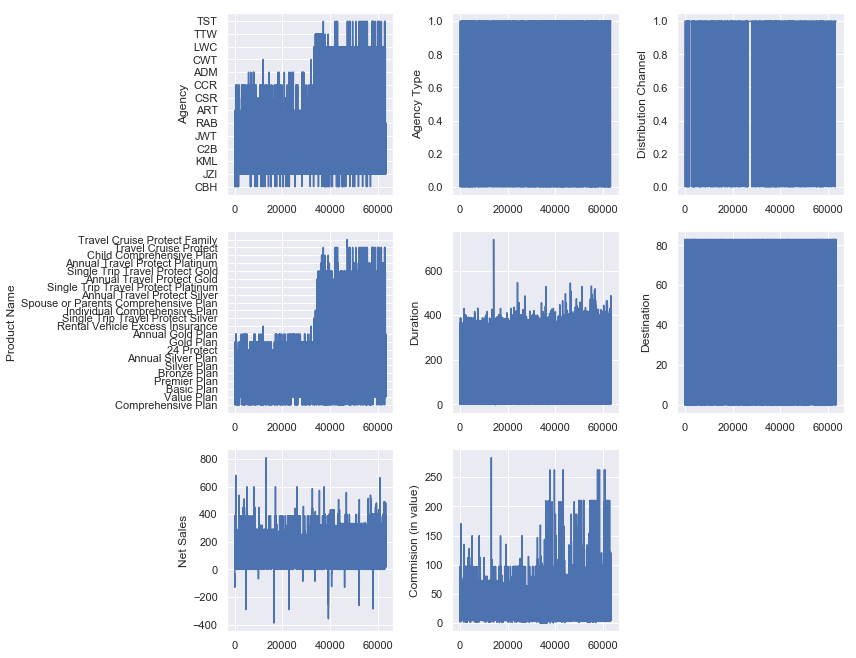

In [93]:
fig = plt.figure(figsize=(12,12))
plt.clf()
for i in range(8):
    plt.subplot(4, 3, i+1)
    plt.plot(X2.iloc[:, i])
    plt.ylabel(X2.columns.values[i])
fig.tight_layout()

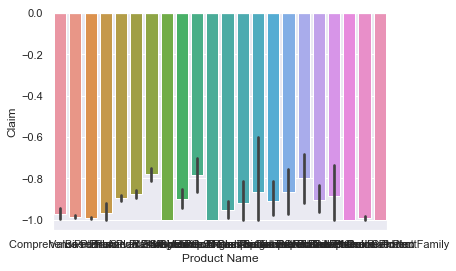

In [87]:
ax7 = sns.barplot(x="Product Name", y="Claim", data=df2)

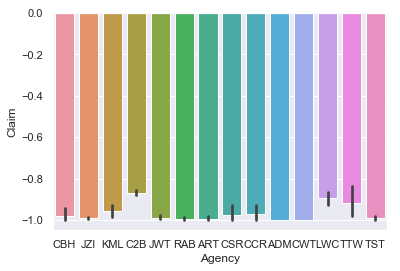

In [88]:
ax = sns.barplot(x="Agency", y="Claim", data=df2)

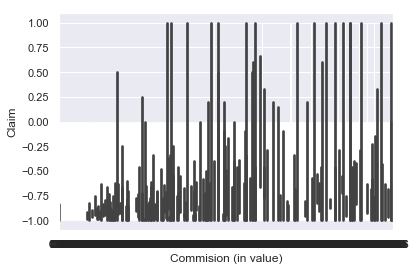

In [83]:
ax3 = sns.barplot(x="Commision (in value)", y="Claim", data=df2)

# III. Methods

## III.A 5-fold Cross Validation

### Summary of CV 

The idea is preparing one dataset (a validation set) by pretending that we cannot see the labels. After choosing a model parameter (or a model) and train it with training dataset, we test it on the validation data. Comparing the validation error, we select the one that has the lowest validation error. Finally, we evaluate the model on testing data. In other words, we divide the data into k folds. then train the data on folds and test on another fold and we repeat this process for all the folds. 

![title](cross.png "Title")

source: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

Here follows the K-fold cross-validation that divides the data into K blocks for traing, validating and testing.

### Explanation of the code

For implementation of the cross validation I used the pseudo code provided in the ML methodology notebook which is as the following:


![title](image.png "Title")

The cross validation implementation has two functions. First getfolds which gets called in cross validation function and simply divides the data into k folds and return it to the crossvalidation function. The crossvalidation dunction takes the data X, target T and parameters. It iterate through the partitions and for each validation partition among the rest of partitions, choose the rest of partitions as training set. Then it iterates through parameters and use the trained model on validation data. Then it evaluate the result based on the RMSE and store them.
Then from the results it picks the best result and retain the model with the best parameter. 


In [166]:
#Splitting the data into k folds
def getfolds(x,k):
    fold = []
    divSize = len(x)/k 
    for i in range(len(x)):
        fold.append(x[int(i):int(i+divSize)])
        i += divSize
    return fold

#function for finding the best parameter
def crossvalidation(X,T, parameters):
    # this is a 5 folds cross validation so 5 is hard coded but can be any number.
    testErrs=[]
    Xpartition = split(X,5.0)
    Tpartition = split(T,5.0)
    for i in range(5):
        Xtest = Xpartition[i]
        Ttest = Tpartition[i]
        normalparam=[]
        for j in range(5):
            if i==j:
                continue
            rmselist=[]
            # train sets
            Xtrain = Xpartition[not i and not j]
            Ttrain = Tpartition[not i and not j]
            # validation sets
            Xvalidation = Xpartition[j]
            Tvalidation = Tpartition[j]
            for p in parameters:
                model=NeuralNet(p)
                model.train(Xtrain, Ttrain)
                result = model.use(Xvalidation)
                errorold = np.sqrt(np.mean((result - Tvalidation)**2))
                rmselist.append(errorold)
                normalparam.append(p)
            best = normalparam[np.argmin(rmselist)] 
            print('-'*50)
            print('parameters = ' + str(best))
            print('Rmse validate = '+ str(min(rmselist)))
            plt.plot(Tvalidation)
            plt.plot(result)
            plt.show()
            bestmodel=NeuralNet(best)
        best = normalparam[np.argmin(rmselist)]
        bestmodel=NeuralNet(best)
        bestmodel.train(Xpartition[not i], Tpartition[not i])
        result2 = bestmodel.use(Xtest)
        currenterror = np.sqrt(np.mean((result2 - Ttest)**2))
        print('-'*50)
        print('parameters = ' + str(best))
        print('RMSE test = ' + str(errocurrenterrorrnew))
        plt.plot(Ttest)
        plt.plot(result2)
        plt.show()
        testErrs.append(currenterror)

        return testErrs

In [146]:
X=df[['temp','atemp','hum','windspeed','casual','registered']]
T=df[['cnt']]

In [149]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 1 columns):
cnt    17379 non-null int64
dtypes: int64(1)
memory usage: 135.9 KB


## III.B Nonlinear Regression

### Summary of nonlinear regression

Feed forward neural networks have a rich representation. Thus, it can represent the linear model with single layer. From this model, we can convert the raw data X to Φ, which is a nonlinear mapping.

ϕ:X→Φ


![title](mlp_linear.png "Title")


![title](nn.png "Title")


### Explanation of the code

The code is provided in the class notebook by professor Lee. 

Standardizer class is used to standardize and unstandardize data. NeuralNet Class uses regression method to build the neural network model. This class has several methods: 

set_hunit: This method updates/initiates the weights

pack: Packs multiple weights of each layer into one vector

forward: forwards the processing of neural network using weights. 

backward: it does the back-propagation of neural network meaning it updates the weights and the bias to minimize the loss.

train: train the neural network model by training the parameters and then optimizing them.

use: this method appplies the trained network for prediction


In [ ]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [ ]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

## III.C Nonlinear Logistic Regression

### Summary of nonlinear logistic regression

we learned the linear logistic regression that uses the softmax layer for classification along with a linear model.


$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

![title](linearlogreg.png "Title")

By using logistic regression we can apply the neuralnet on the non-linearly separable datasets. logistic regression computes the probability of that samples belongs each class. It uses softmax instead of tanh as activation function. 




### Explanation of the code

NeuralNetLogReg class several methods. it inherits the NeuralNet class and it overrides some of its functions. The forward method updates the weights based on softmax function implemented in the logistic regression. Train method trains the model considering two cases if T is indicator matrix or T is one dimensional. use method applies the trained model to the data. objectf method computes the error which needs to be minimized. 
In the use method after finding the probabilities, by using argmax we can find the class labels. 



In [165]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)
        self.stdTarget = False

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        Y, Z = NeuralNet.forward(self, X) 
        return (np.exp(Y) / np.sum(np.exp(Y), axis=1, keepdims = True), Z) 
    # This is the error function that we want to minimize
    def _objectf(self, T, Y, wpenalty):
        return -np.sum(T * np.log(Y)) + wpenalty #wpenalty is for regularization, to avoid overfitting


    def train(self, X, T, **params):
        
        if(len(T.shape) > 1): 
            #If T is already an indicator matrix (has more than 1 dimension)
            if(T.shape[1] > 1):
                return NeuralNet.train(self, X, T, **params)
            T = T.flatten() 
        
        #If T is 1 dimensional
        uniqueItems = np.unique(T)
        T1 = (T[:,None] == uniqueItems).astype(int)
        return NeuralNet.train(self, X, T1, **params) 
     
    def use(self, X):
        Y = NeuralNet.use(self,X) 
        Y = np.argmax(Y, axis = 1)
        return Y

### Examination of correct implementation (NonlinearLogReg) with toy data.

In [160]:
X = np.array([0,0,1,0,0,1,1,1]).reshape(4,2)

T = np.array([0,1,1,0,1,0,0,1]).reshape(4,2)

 

nn = NeuralNetLogReg([2,4,2])
nn.train(X,T)
Y = nn.use(X)
T1 = np.argmax(T,axis=1)

print("Actual:",T1)
print("Predicted:",Y)
print("Accuraccy",np.sum(Y == T1) / len(Y))

Actual: [1 0 0 1]
Predicted: [1 0 0 1]
Accuraccy 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


# IV - Results

#### The results of comparison of the tested models with CV errors.

--------------------------------------------------
parameters = [6, 20, 1]
Rmse validate = 7.20945580346473


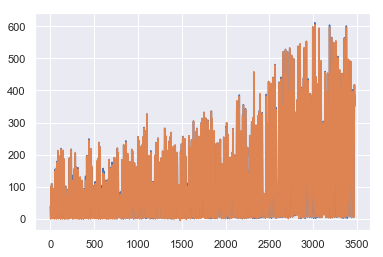

--------------------------------------------------
parameters = [6, 20, 1]
Rmse validate = 7.190583021908953


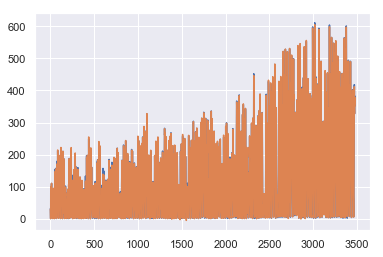

--------------------------------------------------
parameters = [6, 15, 1]
Rmse validate = 7.272387519882277


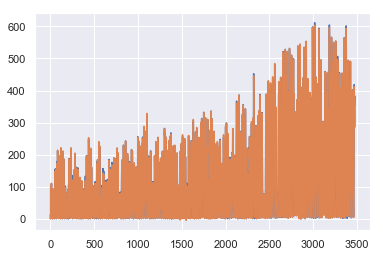

--------------------------------------------------
parameters = [6, 20, 1]
Rmse validate = 7.116996151189752


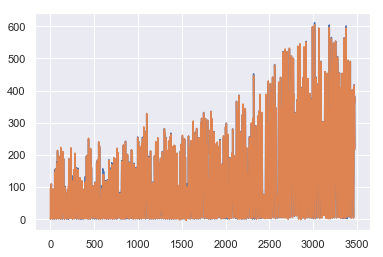

--------------------------------------------------
parameters = [6, 20, 1]
RMSE test = 7.072037762145768


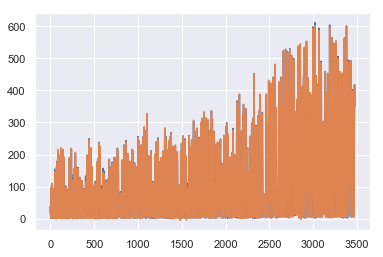

In [158]:
models = [[6,3,1], [6,7,1], [6,10,1], [6,15,1], [6,20,1]]

bestAccuracy = crossvalidation(np.array(X), np.array(T), models)

The results above are showing the RMSE value for different parameters [3,7,10,15,20] which I selected randomly. By comparing the RMSE values from the above results, 20 is the best parameter. 6 is the number of features and 1 is the number of classes for prediction.

#### Partitioning the data 

In [34]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [35]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [36]:
Xtrain = Xlst[0][['temp','atemp','hum','windspeed','casual','registered']].values
Ttrain = Tlst[0][['cnt']].values
Xtest = Xlst[1][['temp','atemp','hum','windspeed','casual','registered']].values
Ttest = Tlst[1][['cnt']].values
print(Xtrain.shape, Ttrain.shape)
print(Xtest.shape, Ttest.shape)

(13903, 6) (13903, 1)
(3476, 6) (3476, 1)


In [47]:

def NNModel(X_train, X_test, y_train, y_test, f, h = 3, o = 1, lamb = 0.):
    nn = NeuralNet([f,h,o])
    nn.train(X_train, y_train,Lambda = lamb, niter =1000) 
    Y_pred = nn.use(X_test)
    print('RMSE = '+ str(np.sqrt(np.mean((y_test - Y_pred)**2))))
    return Y_pred

In [71]:
Y_predlist = []
for h in np.array([3,7,10,15,20]):
    for l in np.array([0., 0.001, 0.01,0.2,0.3]):
        print('-'*50)
        print('Hidden layers = {} , lambda = {} '.format(h,l))
        Y_pred = NNModel(Xtrain, Xtest,Ttrain, Ttest, X.shape[1], h, 1, lamb = l)
        Y_predlist.append(Y_pred)

--------------------------------------------------
Hidden layers = 3 , lambda = 0.0 
RMSE = 4.181372113994152
--------------------------------------------------
Hidden layers = 3 , lambda = 0.001 
RMSE = 22.417611351794996
--------------------------------------------------
Hidden layers = 3 , lambda = 0.01 
RMSE = 37.154676794082945
--------------------------------------------------
Hidden layers = 3 , lambda = 0.2 
RMSE = 141.91741400516827
--------------------------------------------------
Hidden layers = 3 , lambda = 0.3 
RMSE = 173.92055996370885
--------------------------------------------------
Hidden layers = 5 , lambda = 0.0 
RMSE = 3.985336817461559
--------------------------------------------------
Hidden layers = 5 , lambda = 0.001 
RMSE = 10.496616589267509
--------------------------------------------------
Hidden layers = 5 , lambda = 0.01 
RMSE = 31.456450651740465
--------------------------------------------------
Hidden layers = 5 , lambda = 0.2 
RMSE = 183.654674427748

### Discussions about parameter/network structure choice

I randomly chose [3,7,10,15,20] as parameters and [0, 0.001, 0.01, 0.2, 0.3] for lambda and observed the results for different combinations which are printed above. By comparing the results when lambda is 0 results are the best and as the lambda value is increasing the performance is dropping. Models with the less number of layers are not doing good and with more number of layers performance is higher. Among all, Hidden layers = 10 and lambda =0 had the best performance with my dataset. I used 6 features of my dataset.

### Plots for results

--------------------------------------------------
Hidden layers = 3 , lambda = 0.0 


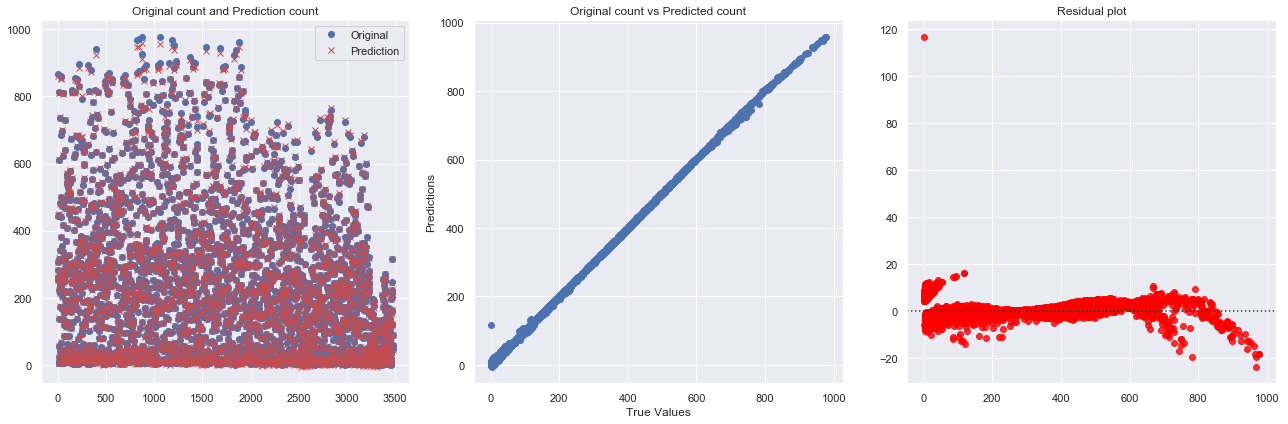

--------------------------------------------------
Hidden layers = 3 , lambda = 0.001 


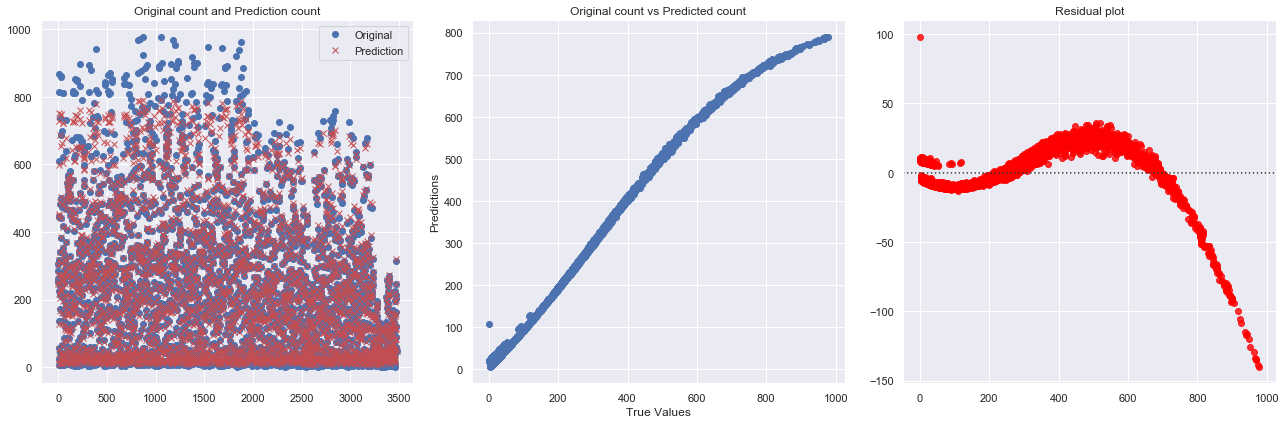

--------------------------------------------------
Hidden layers = 3 , lambda = 0.01 


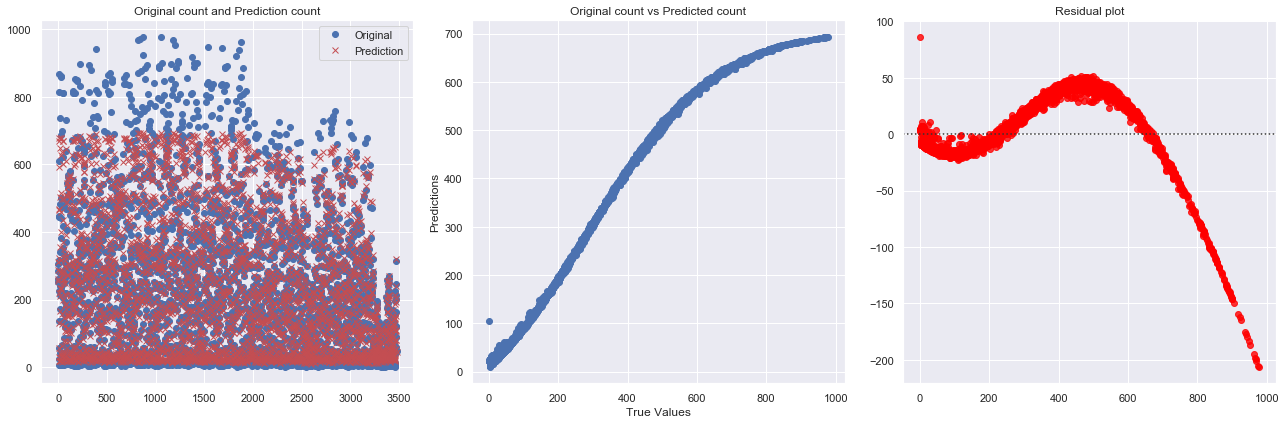

--------------------------------------------------
Hidden layers = 3 , lambda = 0.2 


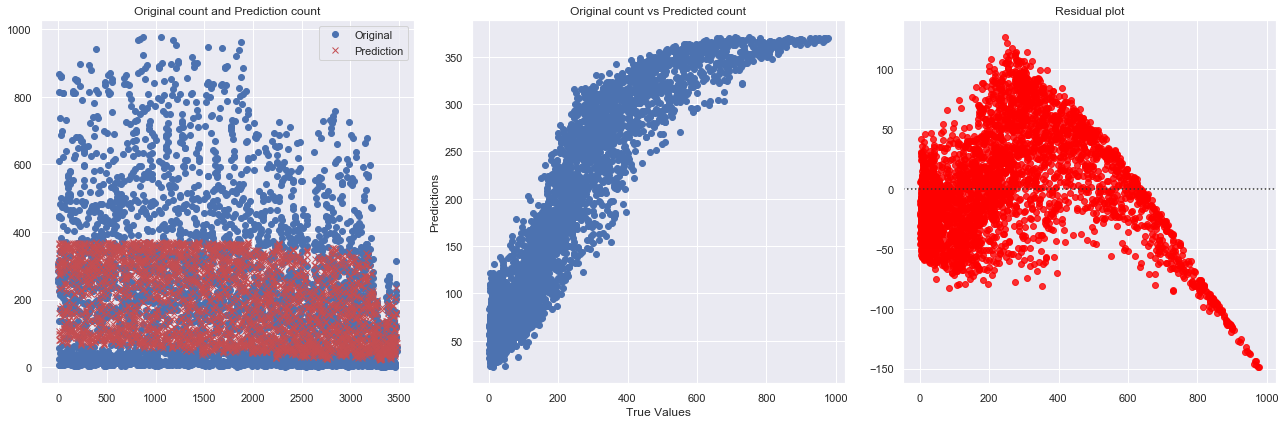

--------------------------------------------------
Hidden layers = 3 , lambda = 0.3 


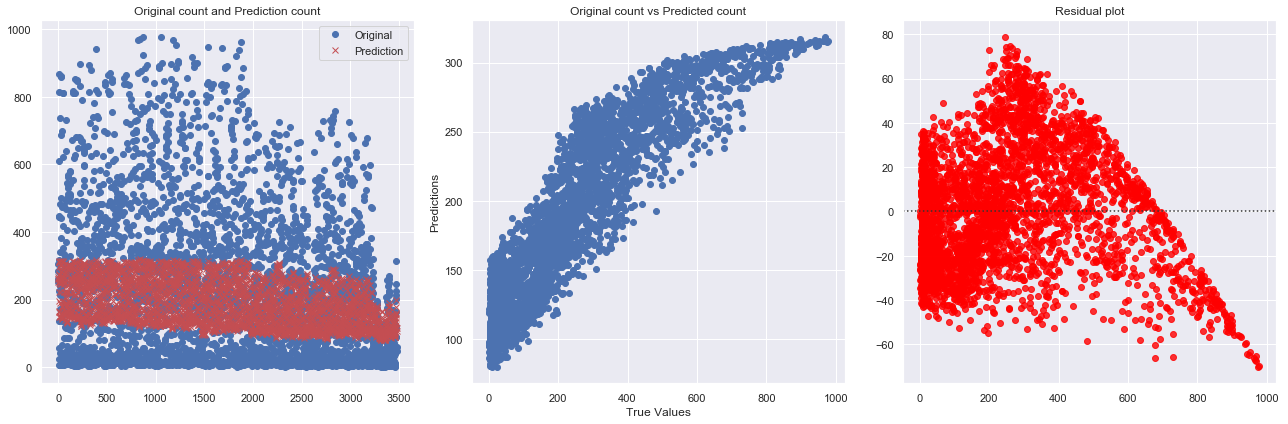

--------------------------------------------------
Hidden layers = 7 , lambda = 0.0 


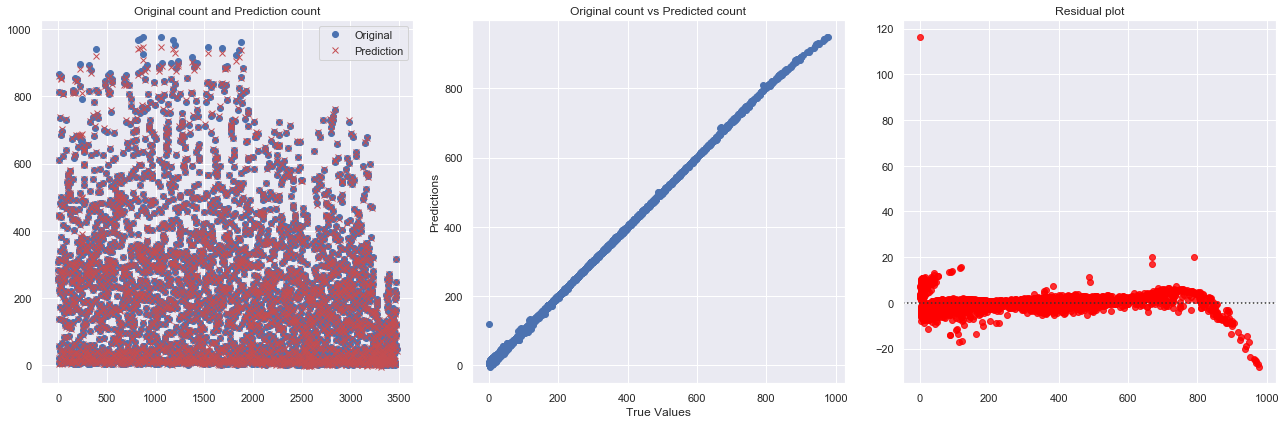

--------------------------------------------------
Hidden layers = 7 , lambda = 0.001 


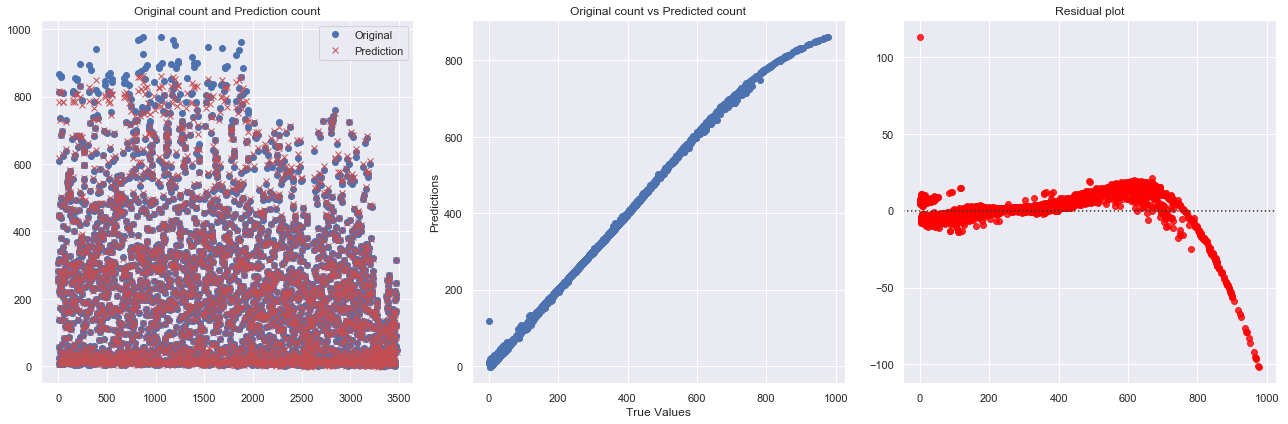

--------------------------------------------------
Hidden layers = 7 , lambda = 0.01 


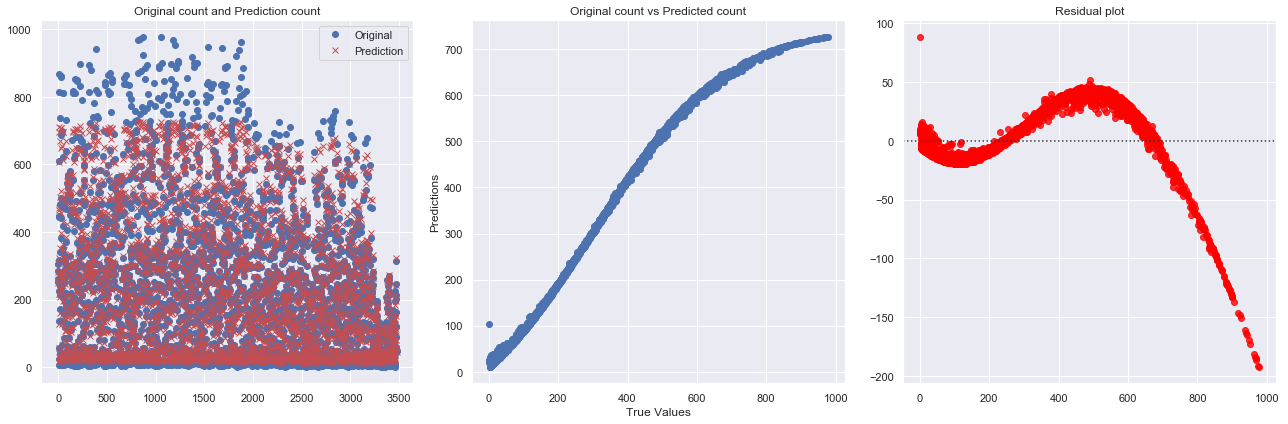

--------------------------------------------------
Hidden layers = 7 , lambda = 0.2 


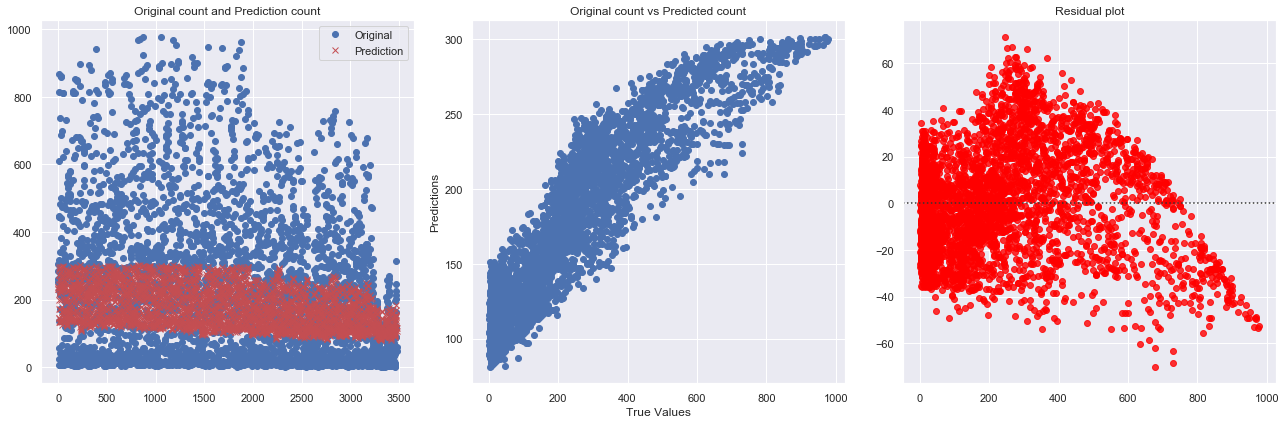

--------------------------------------------------
Hidden layers = 7 , lambda = 0.3 


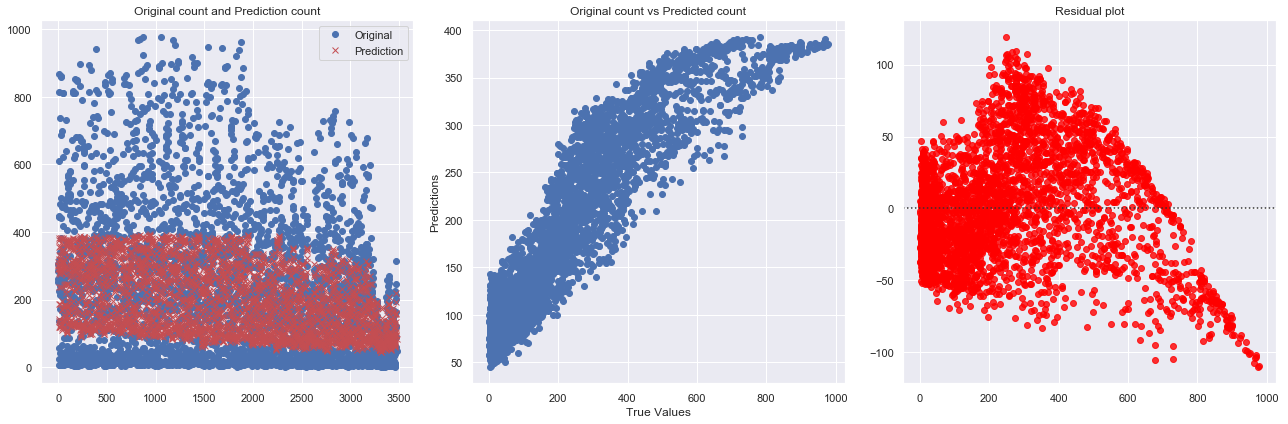

--------------------------------------------------
Hidden layers = 10 , lambda = 0.0 


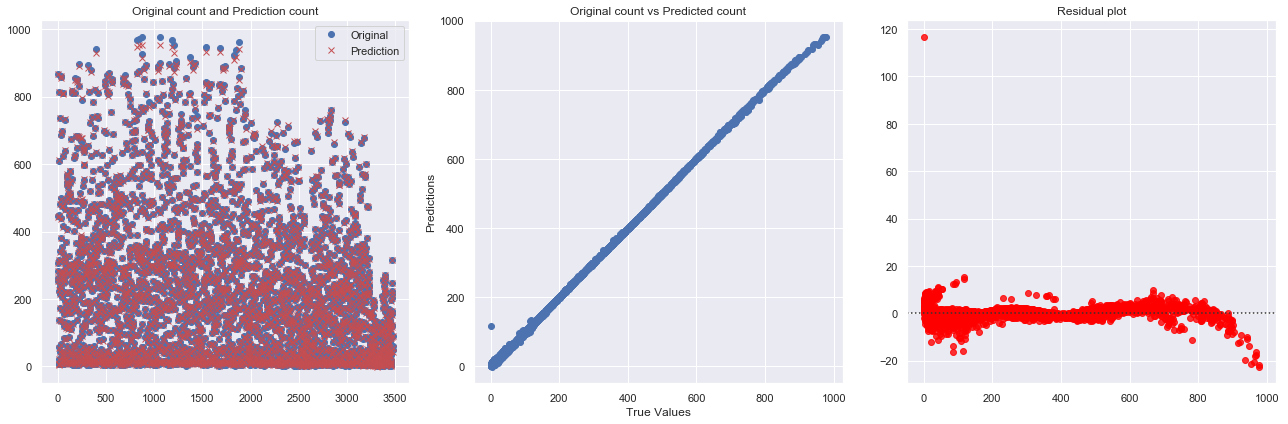

--------------------------------------------------
Hidden layers = 10 , lambda = 0.001 


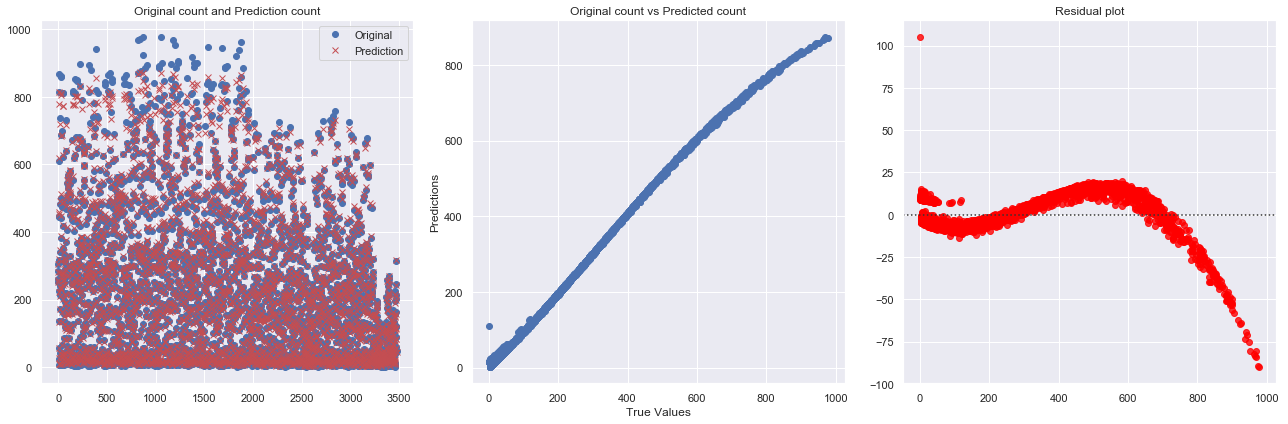

--------------------------------------------------
Hidden layers = 10 , lambda = 0.01 


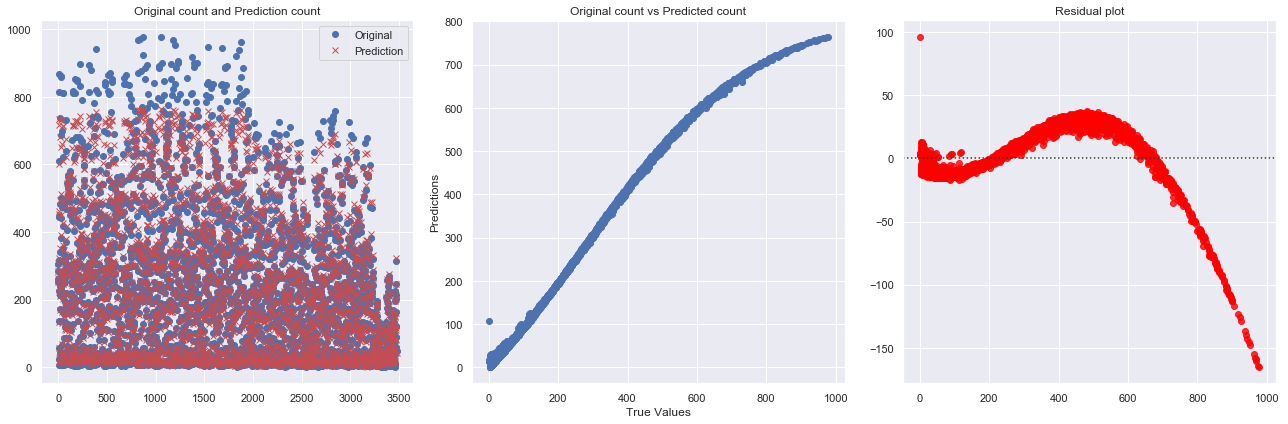

--------------------------------------------------
Hidden layers = 10 , lambda = 0.2 


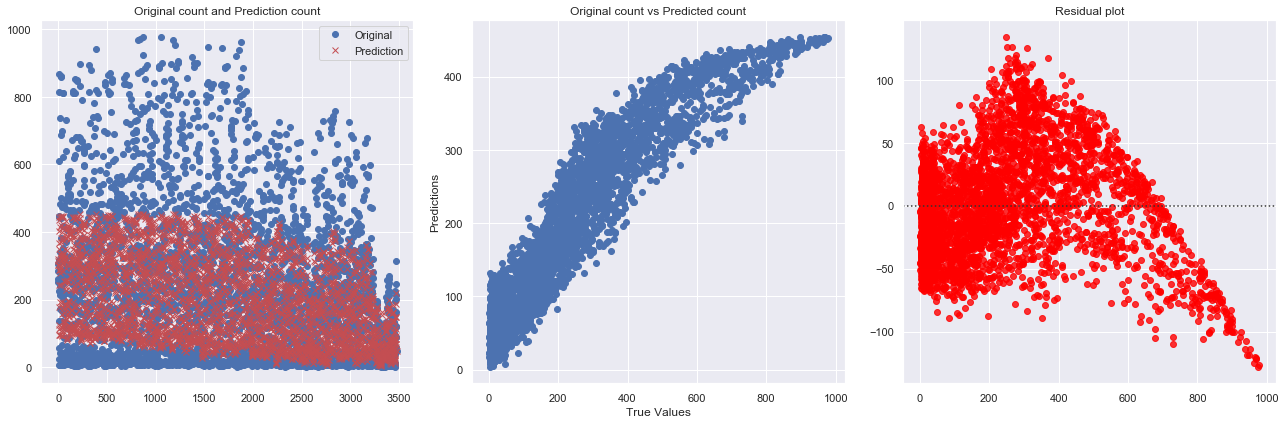

--------------------------------------------------
Hidden layers = 10 , lambda = 0.3 


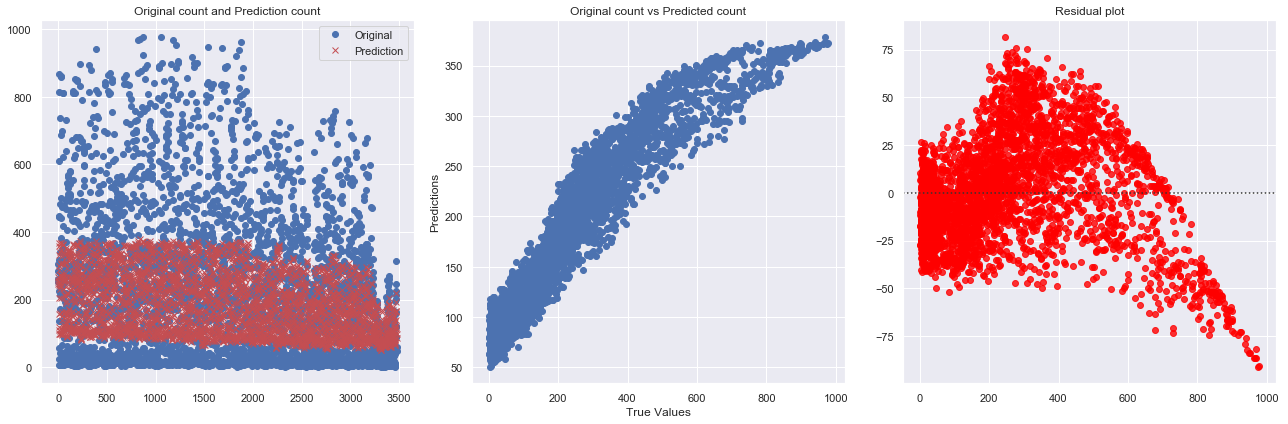

--------------------------------------------------
Hidden layers = 15 , lambda = 0.0 


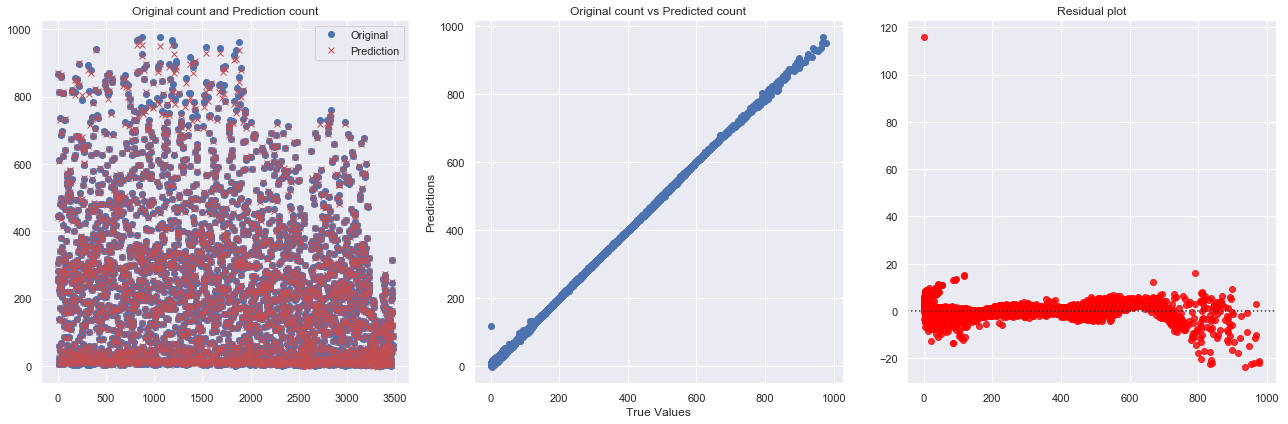

--------------------------------------------------
Hidden layers = 15 , lambda = 0.001 


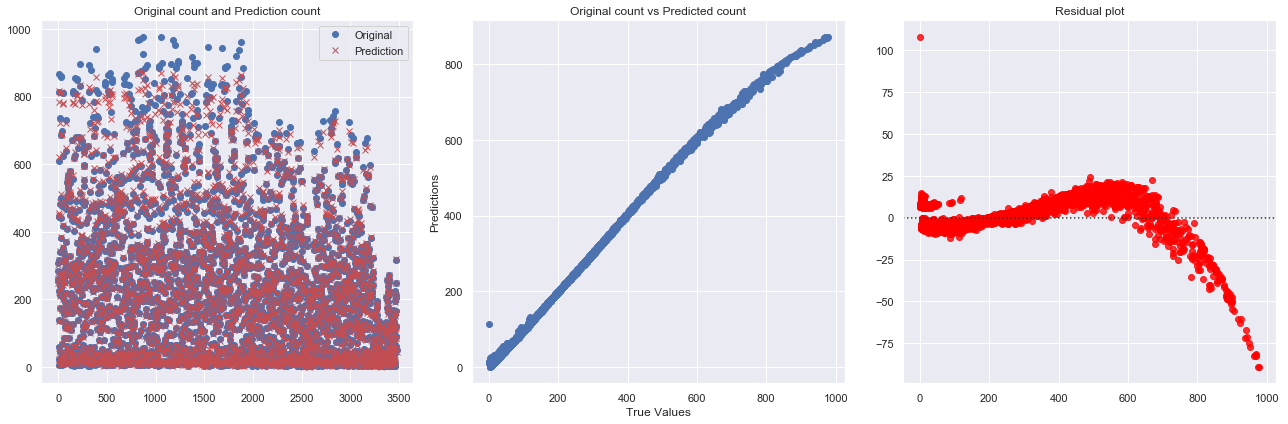

--------------------------------------------------
Hidden layers = 15 , lambda = 0.01 


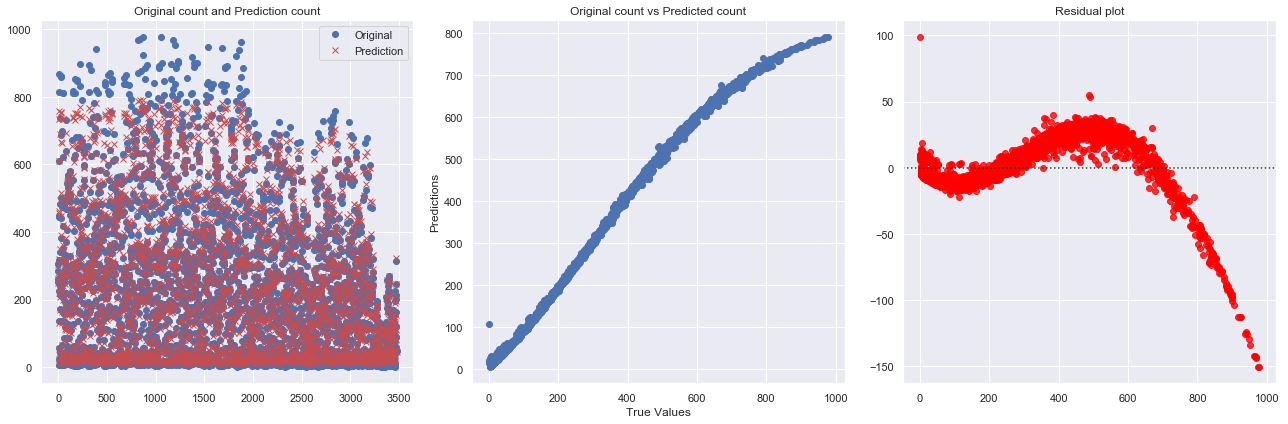

--------------------------------------------------
Hidden layers = 15 , lambda = 0.2 


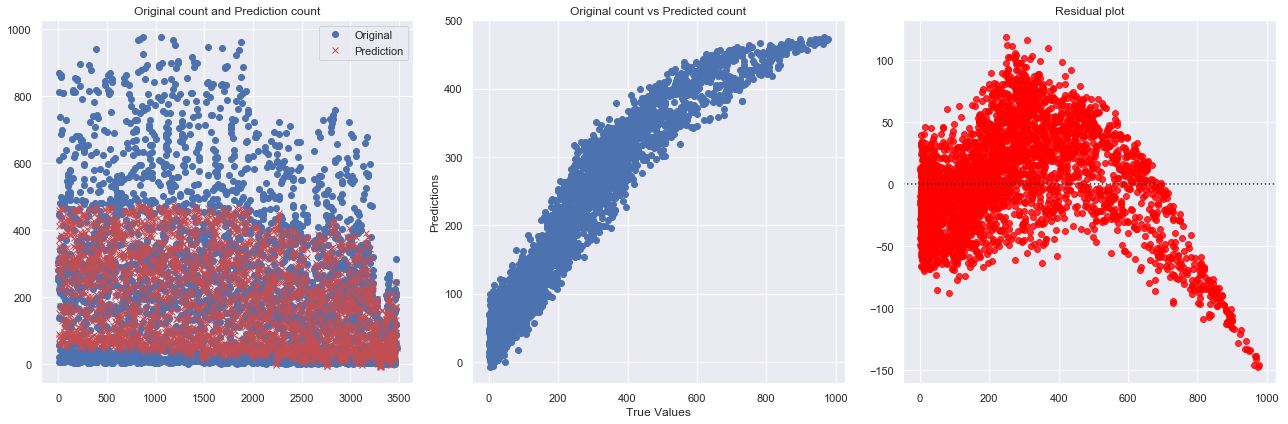

--------------------------------------------------
Hidden layers = 15 , lambda = 0.3 


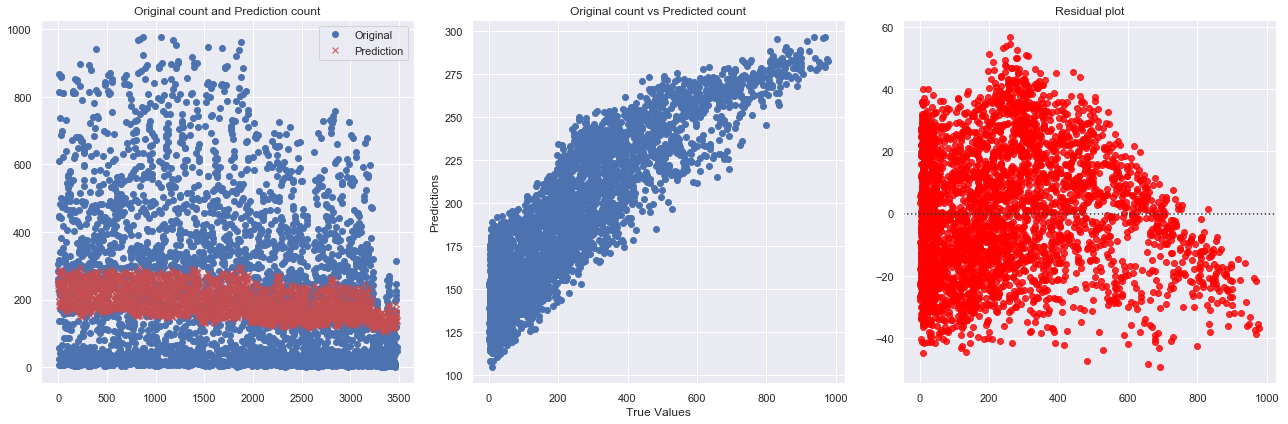

--------------------------------------------------
Hidden layers = 20 , lambda = 0.0 


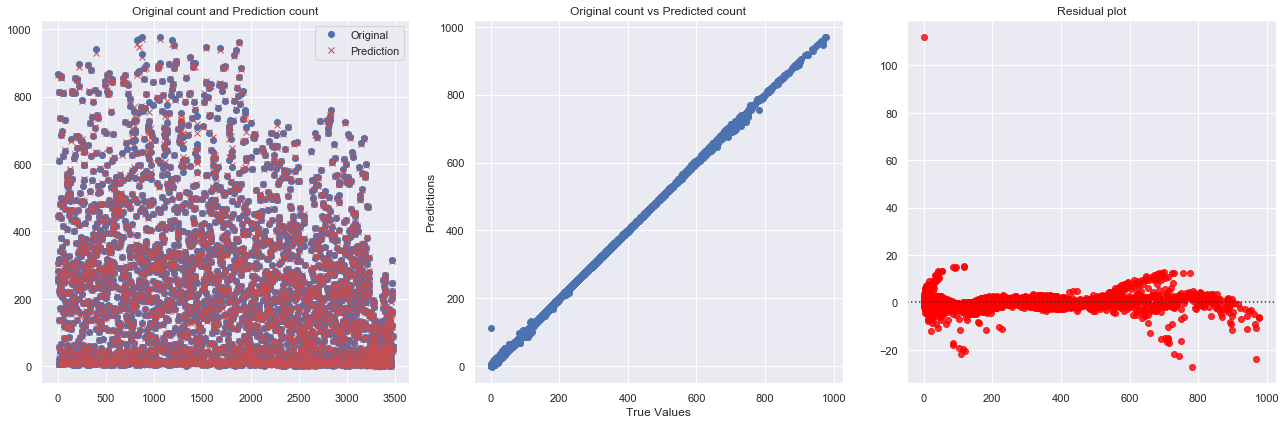

--------------------------------------------------
Hidden layers = 20 , lambda = 0.001 


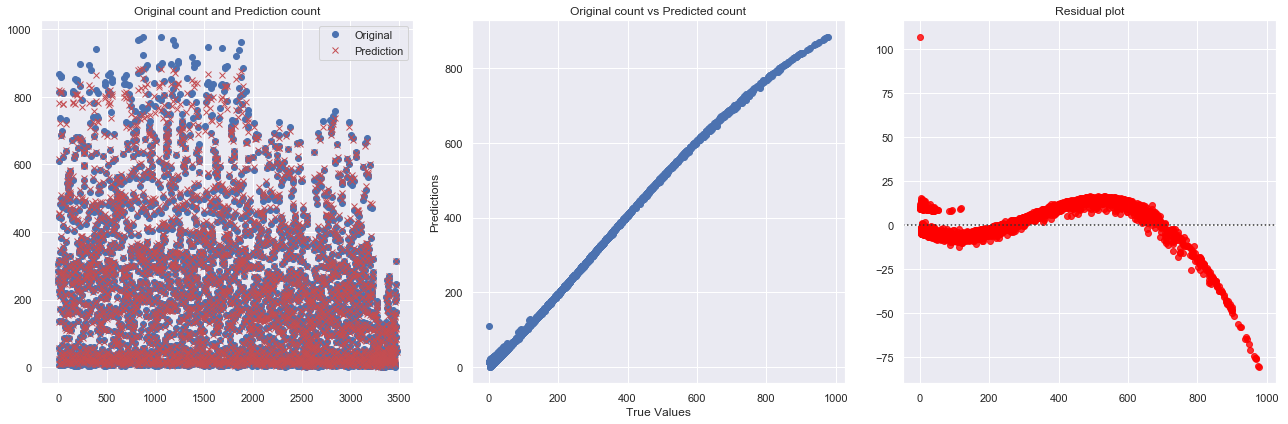

--------------------------------------------------
Hidden layers = 20 , lambda = 0.01 


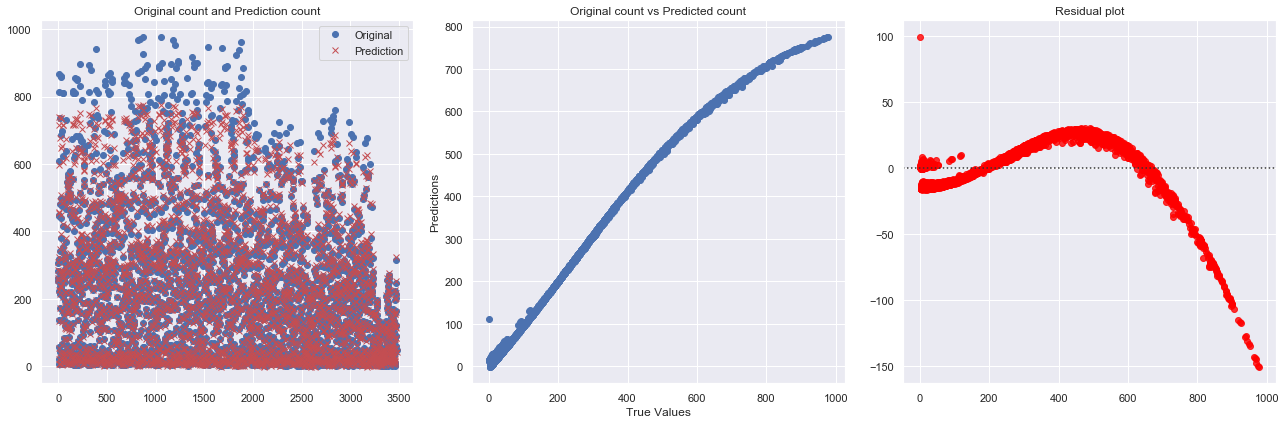

--------------------------------------------------
Hidden layers = 20 , lambda = 0.2 


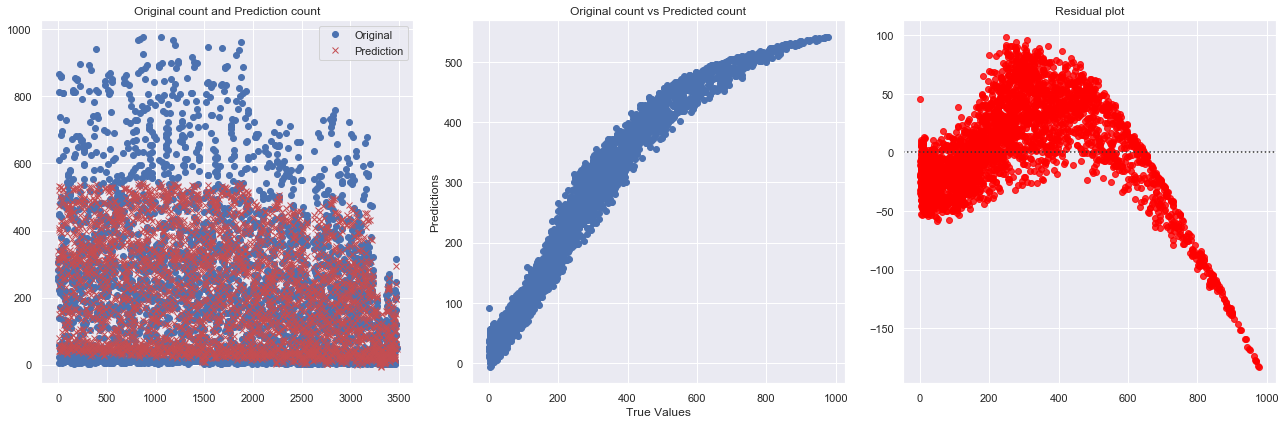

--------------------------------------------------
Hidden layers = 20 , lambda = 0.3 


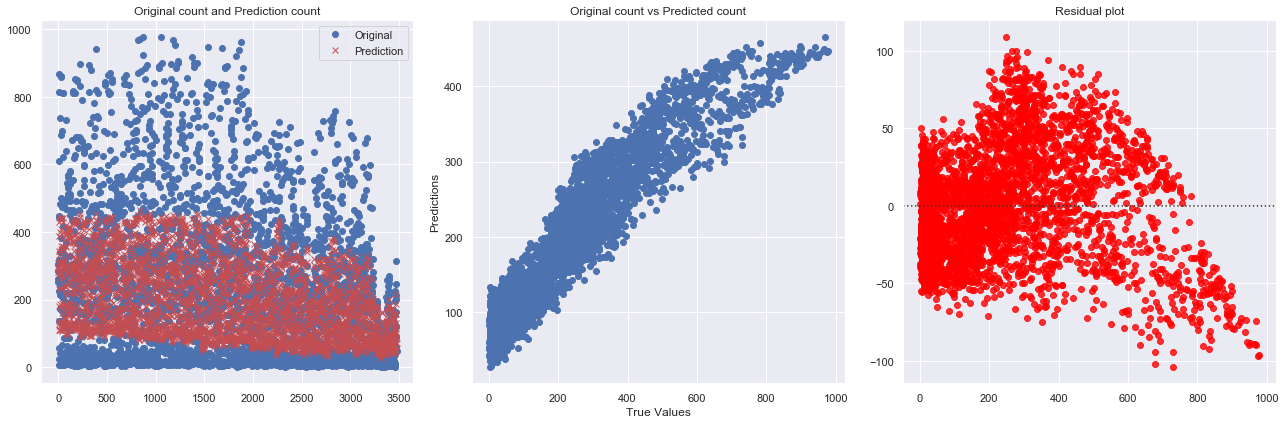

In [164]:
i = 0
for h in np.array([3,7,10,15,20]):
    for l in np.array([0., 0.001, 0.01,0.2,0.3]):     
        print('-'*50)
        print('Hidden layers = {} , lambda = {} '.format(h,l))
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        
        plt.plot(Ttest , 'ob', label='Original');
        plt.plot(Y_predlist[i], 'xr', label='Prediction');
        plt.legend()
        plt.title('Original count and Prediction count');
                
        # true vs predictions
        plt.subplot(1, 3, 2)        
        plt.scatter(Ttest,Y_predlist[i])
        plt.xlabel("True Values")
        plt.ylabel("Predictions")
        plt.title('Original count vs Predicted count')
        #plt.show()
        # residual plot
        plt.subplot(1, 3, 3)    
        sns.residplot(Ttest,Y_predlist[i], color='red');
        plt.title('Residual plot')       
        i += 1
        #print(i)
        plt.tight_layout()
        plt.show()
        

The above plots visualizes all the combinations that I used for training the NeuralNet. By Looking the best performance resylt from the previous section layers=10 and lambda=0, it is obvious that the prediction is very similar to the actual labels. But in cases like Hidden layers = 10 , lambda = 0.3 performance drops dramatically which might be because of the underfitting as the lambda increases.

### Plots of NonlinearLogReg on classification data

In [64]:
T2 = df2['Claim']
X2 = df2.drop(['Claim'],axis=1)

In [65]:
Xlst2, Tlst2 = partition(pd.DataFrame(X2), pd.DataFrame(T2))

In [66]:
Xtrain2 = Xlst2[0].values
Ttrain2 = Tlst2[0].values
Xtest2 = Xlst2[1].values
Ttest2 = Tlst2[1].values
print(Xtrain2.shape, Ttrain2.shape)
print(Xtest2.shape, Ttest2.shape)

(14575, 8) (14575, 1)
(3644, 8) (3644, 1)


In [69]:
nn = NeuralNetLogReg([8,4,2])
nn.train(Xtrain2,Ttrain2)
Y2 = nn.use(Xtest2)
T3 = np.argmax(Ttest2,axis=1)

print("Actual:",T3)
print("Predicted:",Y2)
print("Accuraccy",np.sum(Y2 == T3) / len(Y2))

Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 0.9997255762897914


--------------------------------------------------
Hidden layers = 3
Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 1.0
--------------------------------------------------
Hidden layers = 5
Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 0.9997255762897914
--------------------------------------------------
Hidden layers = 10
Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 0.9986278814489572
--------------------------------------------------
Hidden layers = 12
Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 0.9978046103183315
--------------------------------------------------
Hidden layers = 15
Actual: [0 0 0 ... 0 0 0]
Predicted: [0 0 0 ... 0 0 0]
Accuraccy 0.9983534577387486


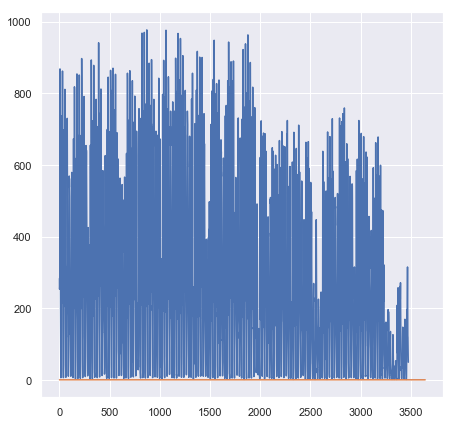

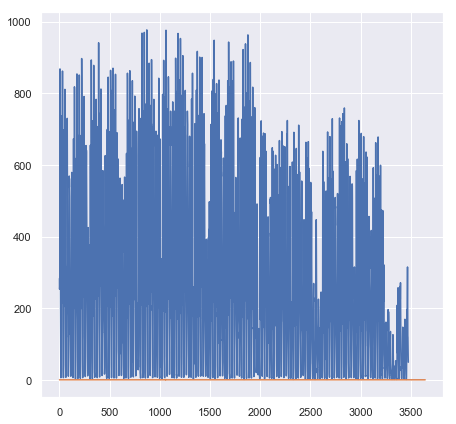

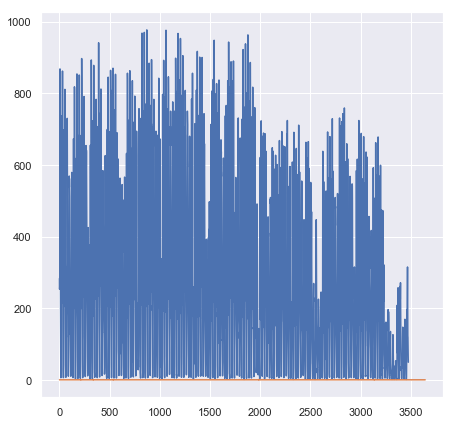

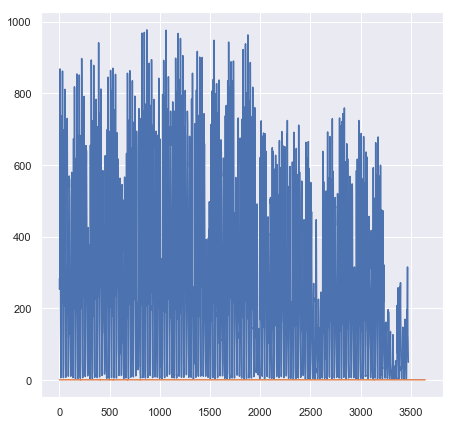

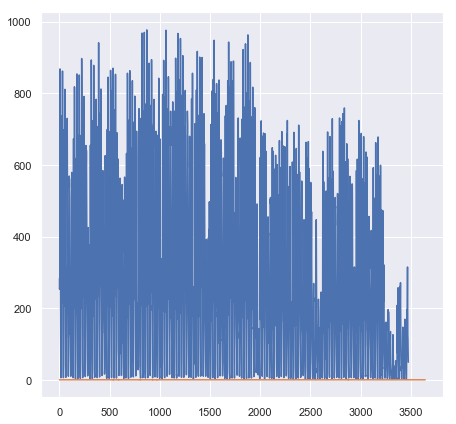

In [75]:
Y_predlist2 = []
for h in np.array([3,5,10,12,15]):
        print('-'*50)
        print('Hidden layers = {}'.format(h,l))
        nn = NeuralNetLogReg([8,h,2])
        nn.train(Xtrain2,Ttrain2)
        Y2 = nn.use(Xtest2)
        T3 = np.argmax(Ttest2,axis=1)
        
        Y_predlist.append(Y2)
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)

        print("Actual:",T3)
        print("Predicted:",Y2)
        print("Accuraccy",np.sum(Y2 == T3) / len(Y2))

        plt.plot(Ttest)
        plt.plot(Y2)
        
        plt.tight_layout()

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

Overall the accuracy of the logistic regression model was higher in comparison to the linear regression model. But comparing them is not valid as the two datasets are different. The performance of the logreg on toy data was 100 percent and was performing very well on my dataset (all of the parameters were producing 99 accuracy). 



# Conclusions

In this assignment I learned about the cross validation. I got the concept by going through the algorithm provided in the class notebook which I believe was very helpful. The experiments with different values of lambda and Hidden layers was inetersting and also the plotting made everything more clear.

I most challenging part was dealing with dimension errors as always when I do ML assignments. This time I found out the shape method for dataframes can be really helpful. I was surprised by the very high accuracy of the logreg model and I was thinking that might happen because of the too many 0 values in the label. 

I had more fun with the linear regression while I was comparing different layers and lambda values and changing them to see how the results is changing. 